1. **Introduction**

**Data Problem**

 The FIFA World Cup, a global football sporting event that takes place every four years, is in Qatar this year. This dataset contains 30,000 tweets from the first day of the FIFA World Cup 2022.The dataset includes tweets in English containing the hashtag #WorldCup2022.

**Objective of the notebook**



*   Try Bidirectional LSTM model
*   Try Transfer learning to see if there is *improvement*



**Dataset Description**

The dataset includes features such as

*   Date Created
*   Number of Likes
*   Source of Tweet
*   Tweet


2. **Importing Libraries**

Importing libraries that will be used in this notebook.

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize
#from wordcloud import WordCloud,STOPWORDS
#from bs4 import BeautifulSoup
import re#,string,unicodedata

#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import LinearSVC
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
#from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils import plot_model

3. **Reading Data Set**

In [ ]:
df= pd.read_csv('/content/fifa_world_cup_2022_tweets.csv')

In [ ]:
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [ ]:
df.shape

(22524, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       22524 non-null  int64 
 1   Date Created     22524 non-null  object
 2   Number of Likes  22524 non-null  int64 
 3   Source of Tweet  22524 non-null  object
 4   Tweet            22524 non-null  object
 5   Sentiment        22524 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


4. **Some data exploration**

In [ ]:
df['Sentiment'].value_counts(normalize=True)

positive    0.376887
neutral     0.366320
negative    0.256793
Name: Sentiment, dtype: float64

<Axes: xlabel='Sentiment', ylabel='count'>

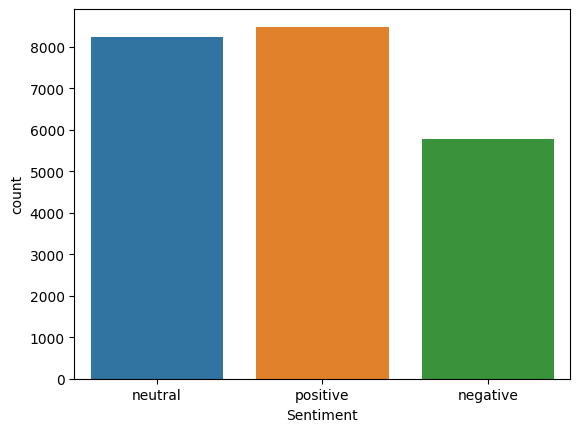

In [ ]:
sns.countplot(x='Sentiment', data=df)

In [ ]:
NUM_WORDS = 10000
EMBEDDING_DIM = 64
MAXLEN = 20
PADDING = 'post'
OOV_TOKEN = "<OOV>"

In [ ]:
# List of abbreviations to be replaced
abbreviations = {
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
}

In [ ]:
# List of Contractions to be removed
contractions = {
    "a'ight":"alright",
    "ain't":"are not",
    "amn't":"am not",
    "aren't":"are not",
    "can't":"cannot",
    "'cause": "because",
    "could've":"could have",
    "couldn't":"could not",
    "couldn't've":"could not have",
    "daren't":"dare not",
    "daresn't":"dare not",
    "dasn't":"dare not",
    "didn't":"did not",
    "doesn't":"does not",
    "don't":"do not",
    "everybody's":"everybody is",
    "everyone's":"everyone is",
    "giv'n":"given",
    "gonna":"going to",
    "gon't":"go not",
    "gotta":"got to",
    "hadn't":"had not",
    "had've":"had have",
    "hasn't":"has not",
    "haven't":"have not",
    "he'd":"he had",
    "he'll":"he will",
    "he's":"he is",
    "here's":"here is",
    "how'd":"how did",
    "how'll":"how will",
    "how're":"how are",
    "how's":"how is",
    "I'd":"I had",
    "I'd've":"I would have",
    "I'd'nt":"I would not",
    "I'd'nt've":"I would not have",
    "I'll":"I will",
    "I'm":"I am",
    "I've":"I have",
    "isn't":"is not",
    "it'd":"it would",
    "it'll":"it will",
    "it's":"it is",
    "let's":"let us",
    "ma'am":"madam",
    "mayn't":"may not",
    "may've":"may have",
    "mightn't":"might not",
    "might've":"might have",
    "mustn't":"must not",
    "mustn't've":"must not have",
    "must've":"must have",
    "needn't":"need not",
    "needn't've":"need not have",
    "o'clock":"of the clock",
    "oughtn't":"ought not",
    "oughtn't've":"ought not have",
    "shan't":"shall not",
    "she'd":"she would",
    "she'll":"she will",
    "she's":"she is",
    "should've":"should have",
    "shouldn't":"should not",
    "shouldn't've":"should not have",
    "somebody's":"somebody is",
    "someone's":"someone is",
    "something's":"something is",
    "so're":"so are",
    "so’s":"so is",
    "so’ve":"so have",
    "that'll":"that will",
    "that're":"that are",
    "that's":"that is",
    "that'd":"that would",
    "there'd":"there would",
    "there'll":"there will",
    "there're":"there are",
    "there's":"there is",
    "these're":"these are",
    "these've":"these have",
    "they'd":"they would",
    "they'll":"they will",
    "they're":"they are",
    "they've":"they have",
    "this's":"this is",
    "those're":"those are",
    "those've":"those have",
    "to've":"to have",
    "wasn't":"was not",
    "we'd":"we would",
    "we'd've":"we would have",
    "we'll":"we will",
    "we're":"we are",
    "we've":"we have",
    "weren't":"were not",
    "what'd":"what did",
    "what'll":"what will",
    "what're":"what are",
    "what's":"what is",
    "what've":"what have",
    "when's":"when is",
    "where'd":"where did",
    "where'll":"where will",
    "where're":"where are",
    "where's":"where is",
    "where've":"where have",
    "which'd":"which would",
    "which'll":"which will",
    "which're":"which are",
    "which's":"which is",
    "which've":"which have",
    "who'd":"who would",
    "who'd've":"who would have",
    "who'll":"who will",
    "who're":"who are",
    "who's":"who is",
    "who've":"who have",
    "why'd":"why did",
    "why're":"why are",
    "why's":"why is",
    "won't":"will not",
    "would've":"would have",
    "wouldn't":"would not",
    "wouldn't've":"would not have",
    "y'at":"you at",
    "yes’m":"yes madam",
    "you'd":"you would",
    "you'll":"you will",
    "you're":"you are",
    "you've":"you have"
}

5. **Data Preprocessing**

We have to adjust column 'Tweet'.


*   Changing the abbrevation to the full word. The function
    I used is 'change_abbre()'
*   Remove stop_words.  The function I used is
    'remove_stopwords()'

*   Changing the contraction to the full word. The function
    I used is 'change_con()'
*   The last function I used was 'clean_text', which was responsible for removing the emoji's, sentences with html tags, add space after full stop and removing url.





In [ ]:
def change_abbre(sentence):
    """
    Change the abbrevation to full word

    Args:
        sentence (string): sentence to change

    Returns:
        sentence (string): lowercase sentence without the abbrevation
    """

    sentence = sentence.lower()
    words = sentence.split()
    key=  abbreviations.keys()

    new_words = []
    for word in words:
        if word in key:
          word = abbreviations[word]

        new_words.append(word)


    sentence = " ".join(new_words)

    return sentence

In [ ]:
def remove_stopwords(sentence):
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

In [ ]:
def change_cont(sentence):
    """
    Change the contractions to full word

    Args:
        sentence (string): sentence to change

    Returns:
        sentence (string): lowercase sentence without the contractions
    """

    sentence = sentence.lower()
    words = sentence.split()
    key=  contractions.keys()

    new_words = []
    for word in words:
        if word in key:
          word = contractions[word]

        new_words.append(word)


    sentence = " ".join(new_words)

    return sentence

In [ ]:
def clean_text(text):
    #soup = BeautifulSoup(text, "html.parser") #remove html tags
    #text = soup.get_text()
    #text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    return text

In [ ]:
df['Tweet'] = df['Tweet'].apply(clean_text)
df['Tweet'] = df['Tweet'].apply(change_abbre)
df['Tweet'] = df['Tweet'].apply(remove_stopwords)
df['Tweet'] = df['Tweet'].apply(change_cont)

In [ ]:
#To see the changes
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,drinking today @tucantribe @madbears_ @lkinc_a...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,amazing @canadasocceren #worldcup2022 launch v...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,worth reading watching #worldcup2022 co/1sqrna...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,golden maknae shinning bright co/4ayzbzgtx4 #j...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,british broadcasting corporation cares much hu...,negative


6. **Split the dataset**

Spliting 'Tweet' and 'Sentiment' columns to train and test set with test size of 0.3.

In [ ]:
train_text, test_text, train_labels, test_labels = train_test_split(df["Tweet"],df["Sentiment"], test_size=0.3, random_state=42)

In [ ]:
#train_labels = np.array(train_labels)
#test_labels = np.array(test_labels)

7. **Preparing the data**

In [ ]:
def fit_tokenizer(train_sentences, num_words, oov_token):
    """
    Instantiates the Tokenizer class on the training sentences

    Args:
        train_sentences (list of string): lower-cased sentences without stopwords to be used for training
        num_words (int) - number of words to keep when tokenizing
        oov_token (string) - symbol for the out-of-vocabulary token

    Returns:
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    """

    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words = num_words , oov_token = oov_token)

    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)

    return tokenizer

In [ ]:
tokenizer =  fit_tokenizer(train_text, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

In [ ]:
print(f"Vocabulary contains {len(word_index)} words\n")
print(" token included in vocabulary" if "" in word_index else " token NOT included in vocabulary")

Vocabulary contains 29364 words

 token NOT included in vocabulary


In [ ]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    """
    Generates an array of token sequences and pads them to the same length

    Args:
        sentences (list of string): list of sentences to tokenize and pad
        tokenizer (object): Tokenizer instance containing the word-index dictionary
        padding (string): type of padding to use
        maxlen (int): maximum length of the token sequence

    Returns:
        padded_sequences (array of int): tokenized sentences padded to the same length
    """

    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)

    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences , maxlen = maxlen , padding = padding)

    return padded_sequences

In [ ]:
train_padded_seq = seq_and_pad(train_text, tokenizer, PADDING, MAXLEN)
test_padded_seq = seq_and_pad(test_text, tokenizer, PADDING, MAXLEN)

In [ ]:
print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {test_padded_seq.shape}")

Padded training sequences have shape: (15766, 20)

Padded validation sequences have shape: (6758, 20)


In [ ]:
def tokenize_labels(all_labels, split_labels):
    """
    Tokenizes the labels

    Args:
        all_labels (list of string): labels to generate the word-index from
        split_labels (list of string): labels to tokenize

    Returns:
        label_seq_np (array of int): tokenized labels
    """

    # Instantiate the Tokenizer (no additional arguments needed)
    label_tokenizer = Tokenizer()

    # Fit the tokenizer on all the labels
    label_tokenizer.fit_on_texts(all_labels)

    # Convert labels to sequences
    label_seq = label_tokenizer.texts_to_sequences(split_labels)

    # Convert sequences to a numpy array. Don't forget to substact 1 from every entry in the array!
    label_seq_np = np.array(label_seq)
    label_seq_np = np.subtract(label_seq_np , 1)


    return label_seq_np

In [ ]:
train_label_seq = tokenize_labels(df['Sentiment'], train_labels)
test_label_seq = tokenize_labels(df['Sentiment'], test_labels)

In [ ]:
print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{test_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {test_label_seq.shape}\n")


First 5 labels of the training set should look like this:
[[1]
 [0]
 [1]
 [0]
 [2]]

First 5 labels of the validation set should look like this:
[[1]
 [2]
 [1]
 [1]
 [1]]

Tokenized labels of the training set have shape: (15766, 1)

Tokenized labels of the validation set have shape: (6758, 1)



7. **Model**

In [ ]:
model = tf.keras.Sequential([
            Embedding(input_dim=NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAXLEN),
            Bidirectional(LSTM(150)),
            Dropout(0.4),
            Dense(512, activation='relu'),
            Dropout(0.6),
            Dense(256, activation='relu'),
            Dropout(0.10),
            Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history = model.fit(
    train_padded_seq,
    train_label_seq,
    epochs=10,
    validation_data=(test_padded_seq, test_label_seq)
)

Epoch 1/10
493/493 [==============================] - 39s 69ms/step - loss: 0.8049 - accuracy: 0.6128 - val_loss: 0.6656 - val_accuracy: 0.7035
Epoch 2/10
493/493 [==============================] - 29s 59ms/step - loss: 0.5292 - accuracy: 0.7798 - val_loss: 0.6565 - val_accuracy: 0.7160
Epoch 3/10
493/493 [==============================] - 38s 77ms/step - loss: 0.4026 - accuracy: 0.8379 - val_loss: 0.7564 - val_accuracy: 0.6965
Epoch 4/10
493/493 [==============================] - 33s 67ms/step - loss: 0.3159 - accuracy: 0.8752 - val_loss: 0.8248 - val_accuracy: 0.6993
Epoch 5/10
493/493 [==============================] - 29s 58ms/step - loss: 0.2484 - accuracy: 0.9018 - val_loss: 0.9875 - val_accuracy: 0.6925
Epoch 6/10
493/493 [==============================] - 30s 61ms/step - loss: 0.2065 - accuracy: 0.9210 - val_loss: 1.1070 - val_accuracy: 0.6961
Epoch 7/10
493/493 [==============================] - 29s 59ms/step - loss: 0.1759 - accuracy: 0.9333 - val_loss: 1.3748 - val_accuracy:

8. **Validation of model**

<ipython-input-32-ac6939917a26>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, test_acc, 'b', label='Test accuracy', color='red')
<ipython-input-32-ac6939917a26>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, test_loss, 'b', label='Test Loss', color='red')


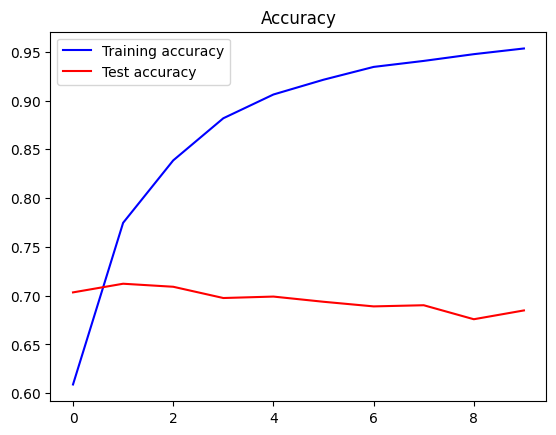

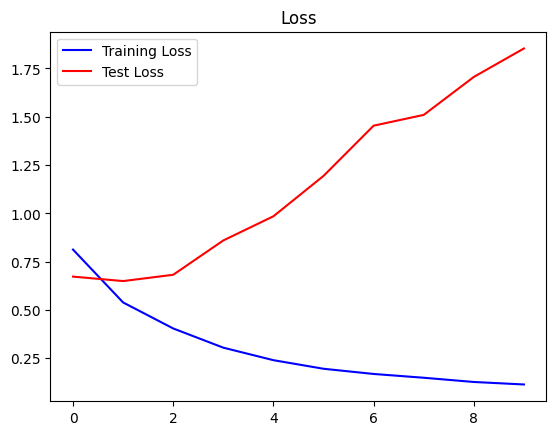

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, test_acc, 'b', label='Test accuracy', color='red')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'b', label='Test Loss', color='red')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
#saving your model
model.save("model.h5")

From this we can see that the model is clearly overfitting. We getting improvement in the training accuracy but not for validatioin accuracy.

9. **Transfer Learning**

In section we will use transfer learning if it can improve the model and avoid overfitting like the previous model.

In [ ]:
import tensorflow_hub as hub

In [ ]:
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['Tweet'], df['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
embedding = 'https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1'
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3,  activation='softmax'))



In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 771       
                                                                 
Total params: 124,676,483
Trainable params: 124,676,483
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history= model.fit(train_texts, train_labels, epochs=5, batch_size=32, validation_data=(test_texts, test_labels))


Epoch 1/5
564/564 [==============================] - 1191s 2s/step - loss: 0.7324 - accuracy: 0.6656 - val_loss: 0.6519 - val_accuracy: 0.7074
Epoch 2/5
564/564 [==============================] - 1113s 2s/step - loss: 0.4639 - accuracy: 0.8104 - val_loss: 0.7014 - val_accuracy: 0.6954
Epoch 3/5
564/564 [==============================] - 1085s 2s/step - loss: 0.3248 - accuracy: 0.8721 - val_loss: 0.8381 - val_accuracy: 0.6948
Epoch 4/5
564/564 [==============================] - 1068s 2s/step - loss: 0.2403 - accuracy: 0.9060 - val_loss: 1.0425 - val_accuracy: 0.6841
Epoch 5/5
564/564 [==============================] - 1063s 2s/step - loss: 0.1729 - accuracy: 0.9314 - val_loss: 1.3439 - val_accuracy: 0.6879


<ipython-input-56-ac6939917a26>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, test_acc, 'b', label='Test accuracy', color='red')
<ipython-input-56-ac6939917a26>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, test_loss, 'b', label='Test Loss', color='red')


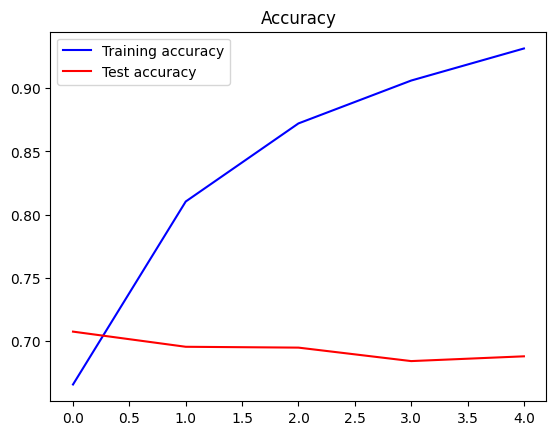

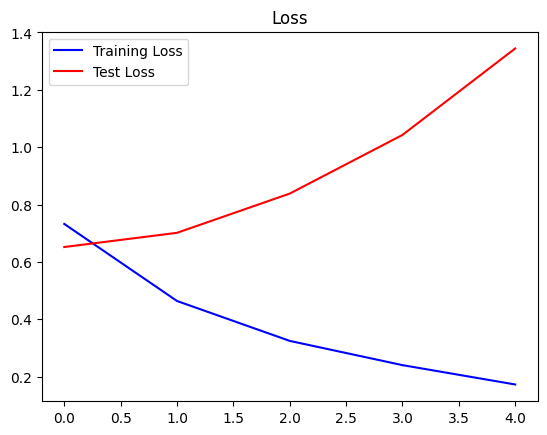

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, test_acc, 'b', label='Test accuracy', color='red')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'b', label='Test Loss', color='red')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
#saving your model
model.save("Transfer_Learning.h5")

Here we can see the model with the transfer learning only improves the accuracy of training data. It didn't fix the overfitting problem.